(2866, 2944, 3)
(2866, 2944)
(array([[[   0,    0]],

       [[   0, 2865]],

       [[2943, 2865]],

       [[2943,    0]]], dtype=int32),)
(2866, 2944)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(640, 640, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(640, 640, 3)
(570, 643, 3)


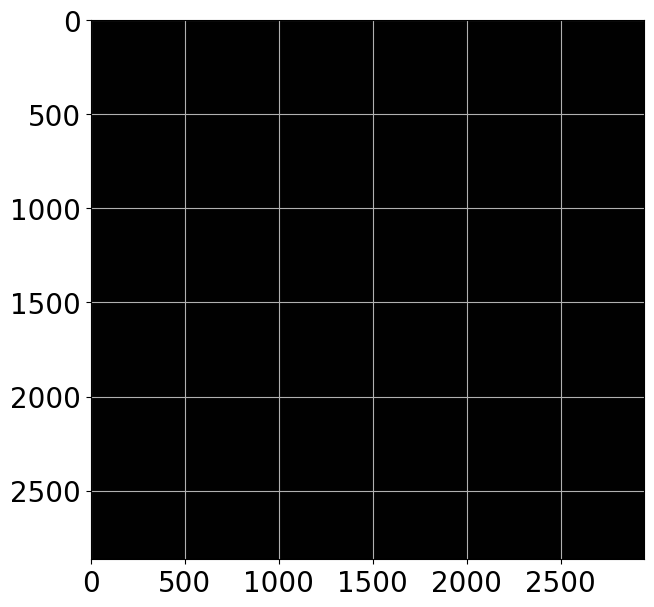

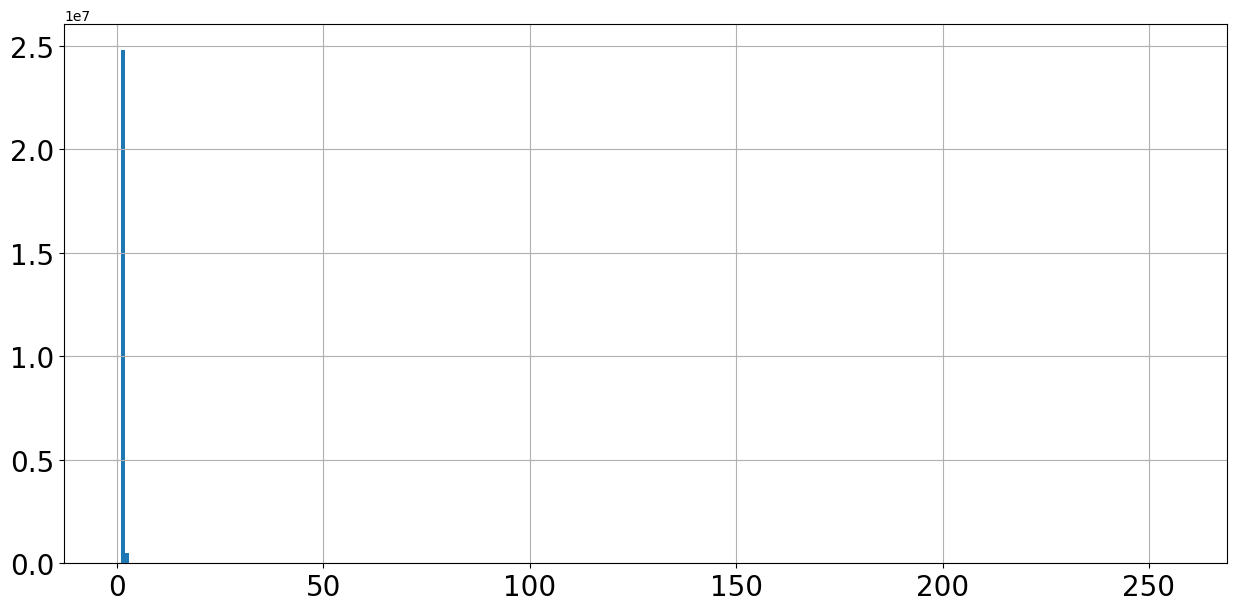

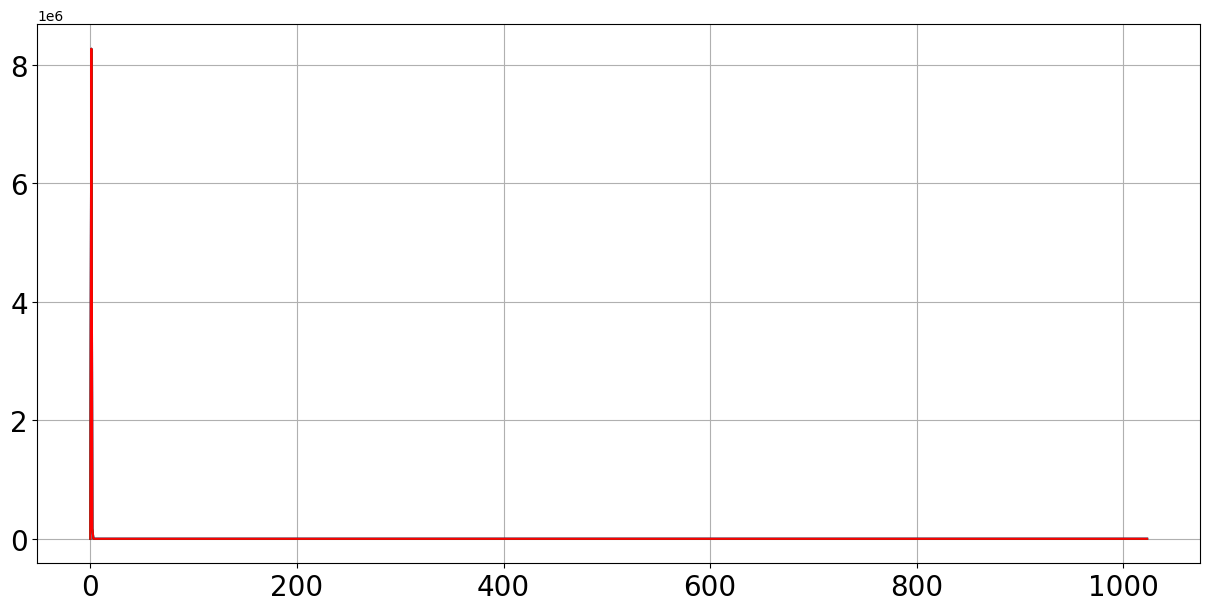

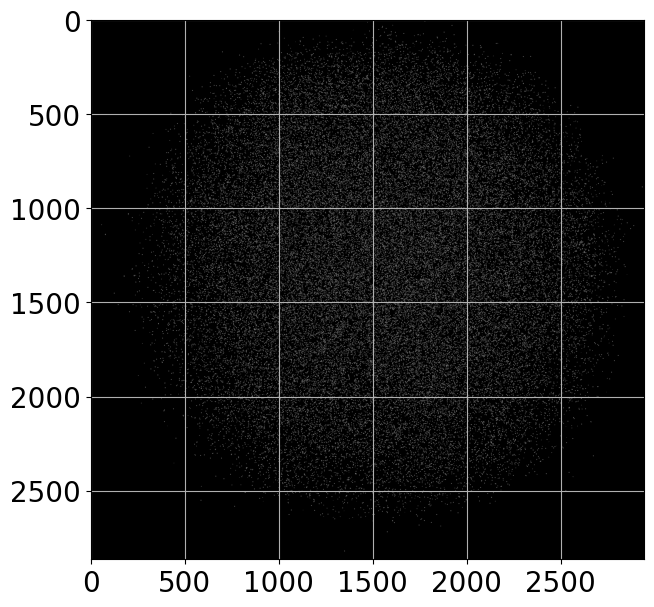

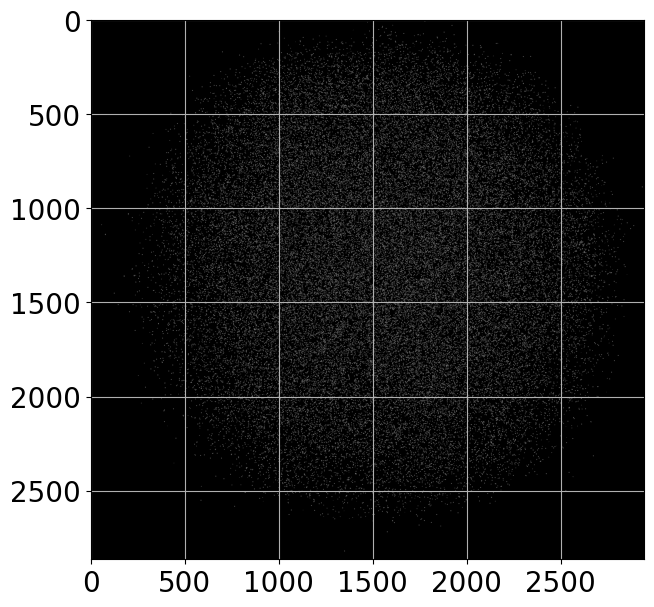

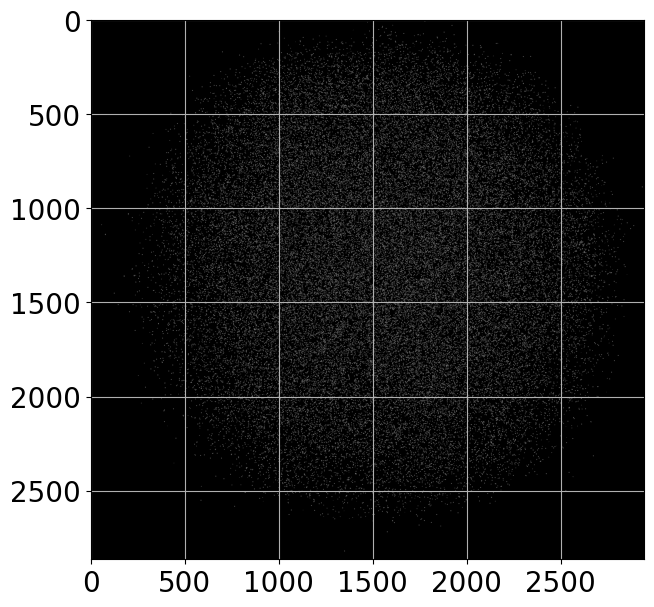

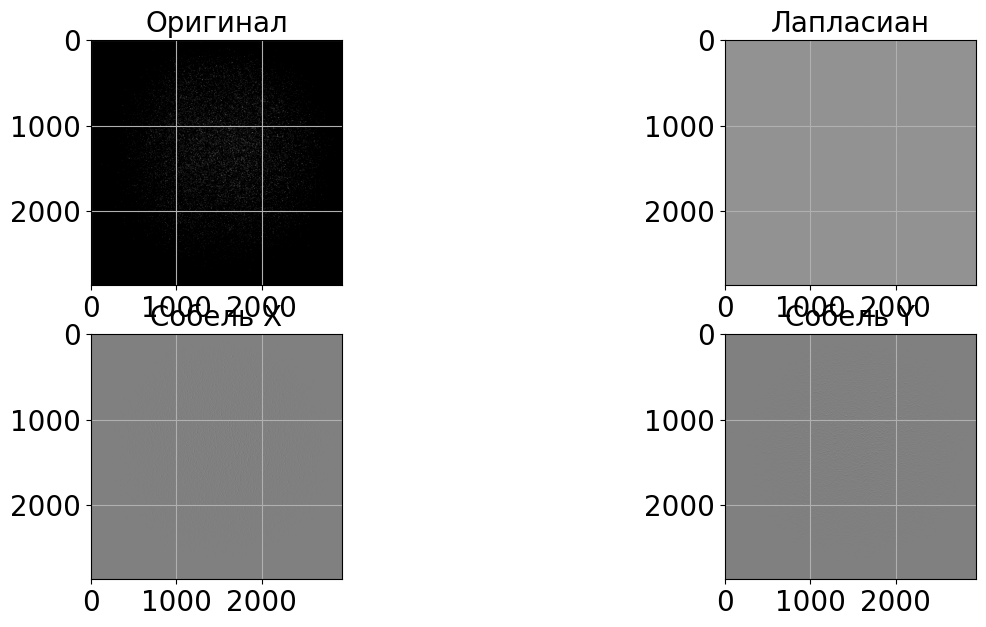

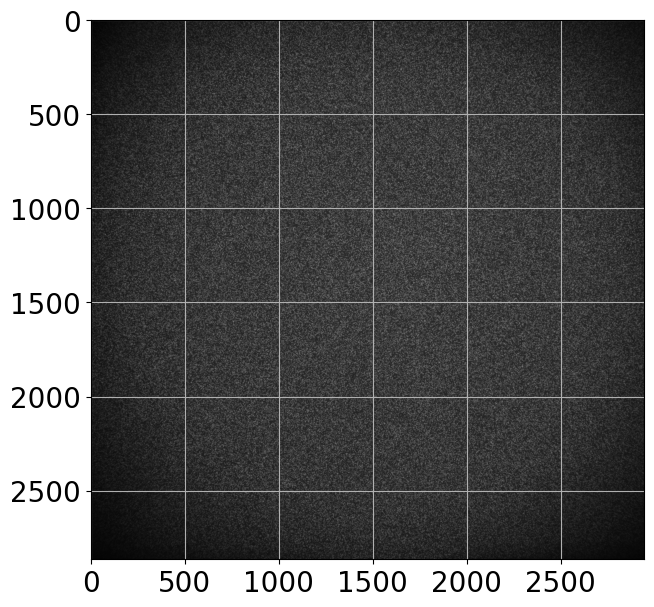

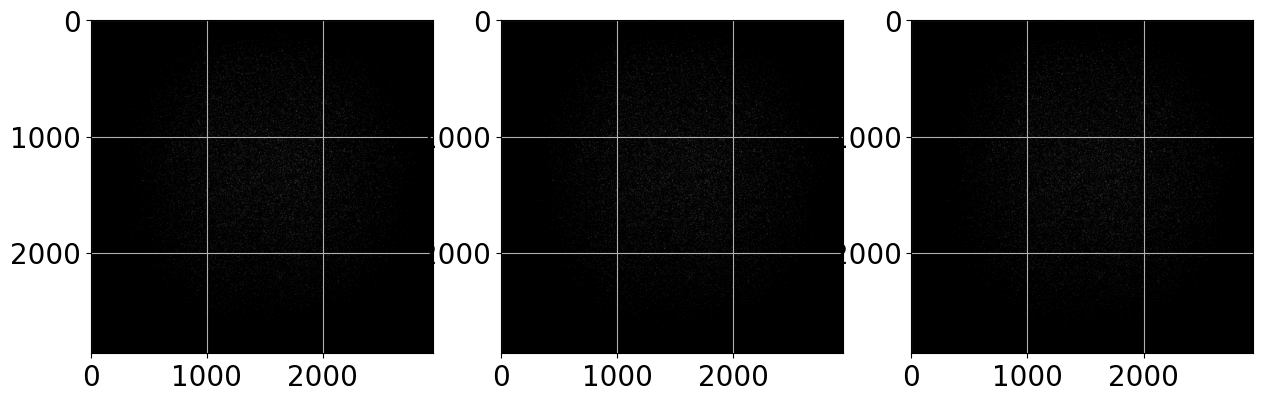

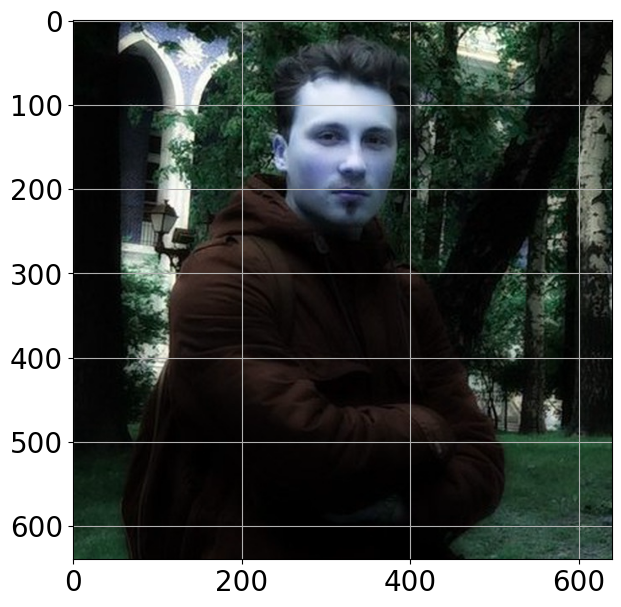

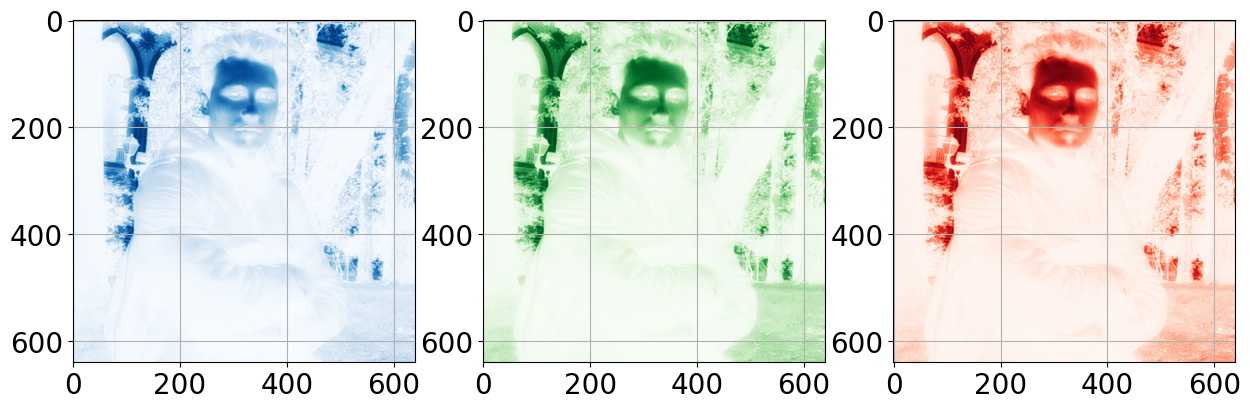

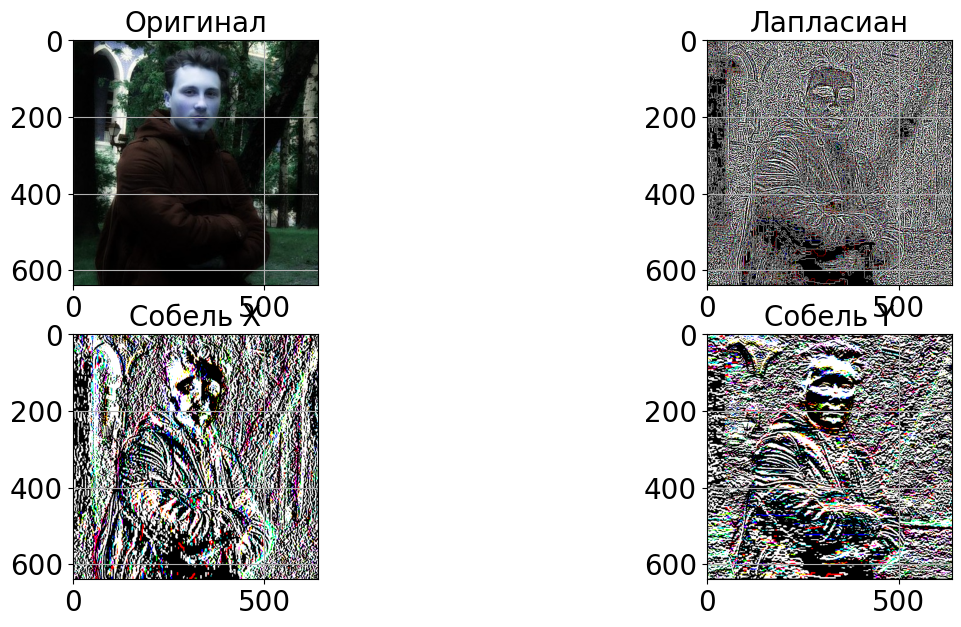

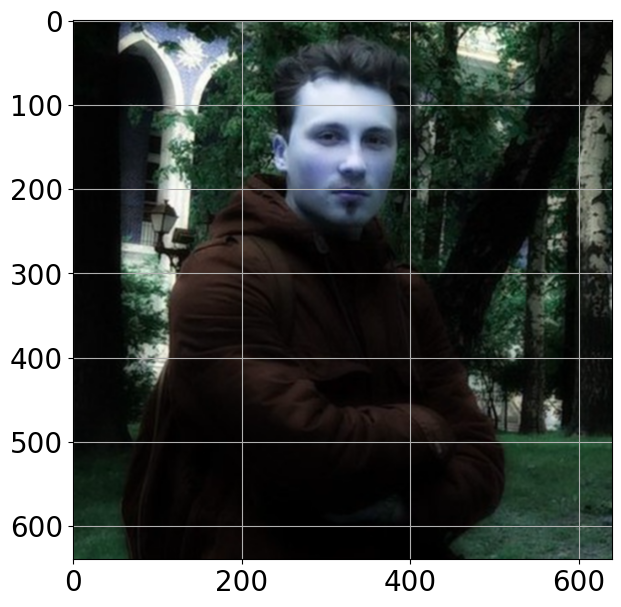

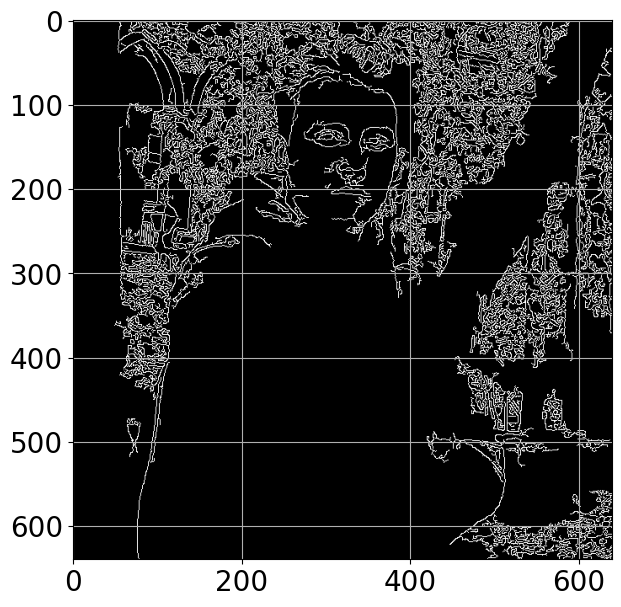

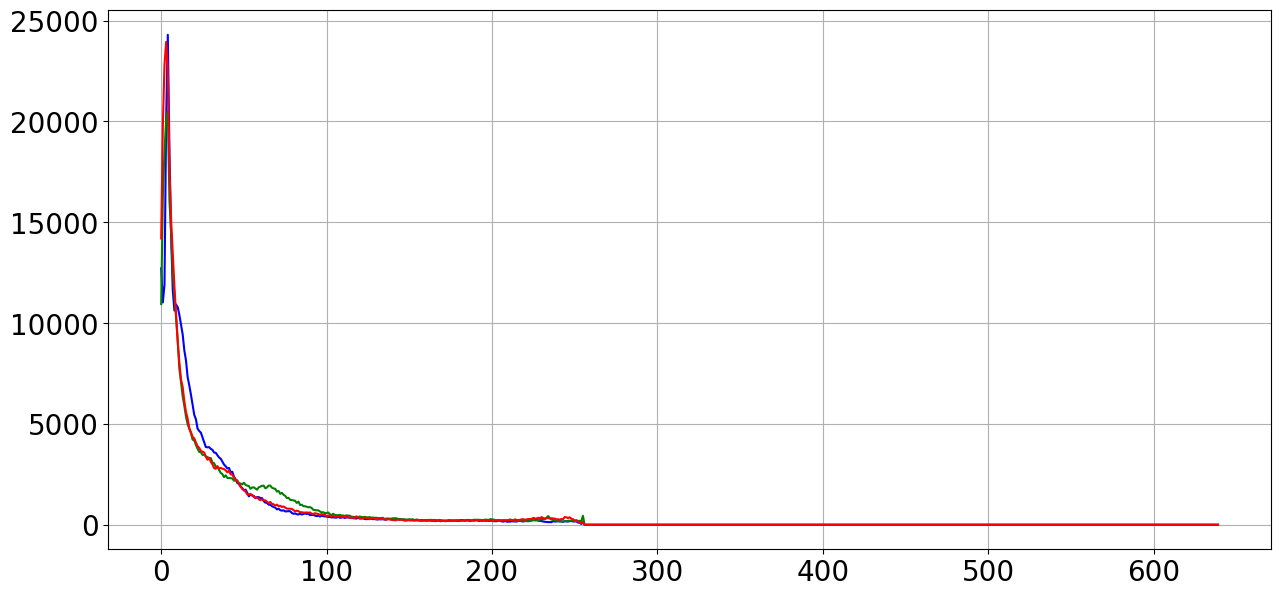

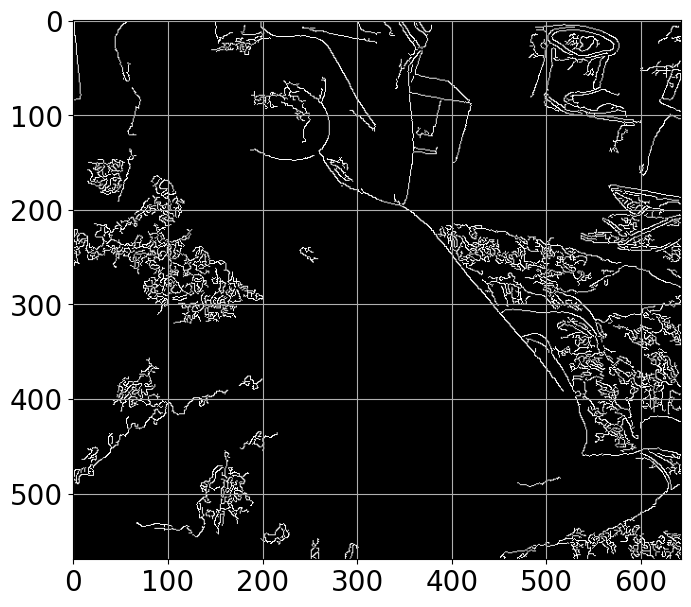

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2



def main():
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1101_a.tif")
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    

    #cv2.imshow('tif image',image)
    plt.figure(figsize=(15,7))
    plt.hist(image.ravel(),256,[0,256])
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    plt.figure(figsize=(15,7))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[1024],[0,1024])
        plt.plot(histr,color = col)
        plt.grid(True)
        plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
        
    #пороги ???   
    edges=cv2.Canny(image,0.1,0.2)
    print(edges.shape)
    
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges=cv2.Canny(image,0.1,0.2)
    #print(edges)
    
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    # фильтрация шума
    img = cv2.GaussianBlur(image,(3,3),0)
    edges=cv2.Canny(image,0.1,0.2)
    #print(edges)
    
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    #фильтры?
    # свёртка с ядрами
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.imshow(img,cmap = 'gray')
    plt.title('Оригинал',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,2)
    plt.imshow(laplacian,cmap = 'gray')
    plt.title('Лапласиан',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,3)
    plt.imshow(sobelx,cmap = 'gray')
    plt.title('Собель X',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,4)
    plt.imshow(sobely,cmap = 'gray')
    plt.title('Собель Y',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #пороги?
    ret, thresh = cv2.threshold(image, 0.01, 1, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    
    #cv2.drawContours( image, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )
    #cv2.imshow('contours', image) # выводим итоговое изображение в окно

    #cv2.waitKey()
    #cv2.destroyAllWindows()
    
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1101_a.tif",-1)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    print(image.shape)
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1101_a.tif")
    b,g,r = cv2.split(image)
    
    
    plt.figure(figsize=(15,7))
    plt.subplot(131)
    #plt.imshow(b,cmap='Blues')
    plt.imshow(b,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(132)
    #plt.imshow(g,cmap='Greens')
    plt.imshow(g,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(133)
    #plt.imshow(r,cmap='Reds')
    plt.imshow(r,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений

    image = cv2.imread("C:/Users/evgen/Downloads/mydicksuckereveryday.jpg")
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    b,g,r = cv2.split(image)
    
    
    plt.figure(figsize=(15,7))
    plt.subplot(131)
    plt.imshow(b,cmap='Blues')
    #plt.imshow(b,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(132)
    plt.imshow(g,cmap='Greens')
    #plt.imshow(g,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(133)
    plt.imshow(r,cmap='Reds')
    #plt.imshow(r,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    #фильтры?
    # свёртка с ядрами
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)  # x
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)  # y
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.title('Оригинал',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,2)
    plt.imshow(laplacian,cmap = 'gray')
    plt.title('Лапласиан',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,3)
    plt.imshow(sobelx,cmap = 'gray')
    plt.title('Собель X',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,4)
    plt.imshow(sobely,cmap = 'gray')
    plt.title('Собель Y',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    # фильтрация шума
    img = cv2.GaussianBlur(image,(3,3),0)
    plt.figure(figsize=(15,7))
    plt.imshow(img)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    print(image.shape)
    edges=cv2.Canny(image,1,180)
    #print(edges)
    
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    plt.figure(figsize=(15,7))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[640],[0,640])
        plt.plot(histr,color = col)
        plt.grid(True)
        plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
        
        
    image = cv2.imread("C:/Users/evgen/Downloads/photo_2023-04-16_22-06-15.jpg")
    print(image.shape)

    edges=cv2.Canny(image,0.15,160)
    #print(edges)
    
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()







